In [39]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import math
import numpy as np
from sklearn import utils
from functools import partial
tf.set_random_seed(777)

def preprocess(Data,max_norm=1,min_norm=0):
    #normalization
    Data = (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm
    # for i in range(len(Data.columns)):
    #     Data[Data.columns[i]] = (Data[Data.columns[i]] - Data[Data.columns[i]].mean())/Data[Data.columns[i]].std()
    #     print('standardized')
    #standardization
    #for i in range(len(Data.columns)):
    #    if Data[Data.columns[i]].std()*3 > (Data[Data.columns[i]].max()-Data[Data.columns[i]].min()):
    #        Data[Data.columns[i]] = (Data[Data.columns[i]] - Data[Data.columns[i]].mean())/Data[Data.columns[i]].std()
    #        print('standardized %d'%i)
    #    else:
    #        Data = (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm
    return Data

Data = pd.read_csv(r'D:\Desktop\190305\csvfile\new\새 폴더 (3)\0d_mean_orig_channel.csv')

# del Data['Unnamed: 0']
# del Data['Nu_t_lsq_n']
del Data['PHI-Alpha_t_lsq_n']
# del Data['Re']
# del Data['Pr']
del Data['X']
# del Data['Y']
del Data['y_plus']
del Data['wedge_height']
del Data['1/Pr']
# del Data['local_volume']

# a = Data['local_volume']

del Data['local_volume']

# Data = pd.DataFrame()
# Data['dk_dx_i_abs'] = data['dk_dx_i_abs']
# Data['dT/dx'] = data['dT/dx']
# Data['dT/dy'] = data['dT/dy']
# # Data['Nu_t_lsq_n'] = data['Nu_t_lsq_n']
# Data['PHI-Alpha_t_lsq_n'] = data['PHI-Alpha_t_lsq_n']
# # Data['PHI-Pr_t_new'] = data['PHI-Pr_t_new']

denorm_min = Data['PHI-Pr_t_new'].min()
denorm_max = Data['PHI-Pr_t_new'].max()

X = Data[Data.columns[:-1]]
X_length = len(X.columns)
Y = Data[Data.columns[-1:]]


x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

# nu_t = x_test['Nu_t_lsq_n']
train_index = x_train['Y']
test_index = x_test['Y']

del x_train['Y']
del x_test['Y']

x_train = preprocess(x_train)
x_test = preprocess(x_test)
y_train = preprocess(y_train)
y_test = preprocess(y_test)

train_index = 

x_train = x_train.values.tolist()
x_test = x_test.values.tolist()
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()

learning_rate = 0.001
l2_reg = 0.0005
# n_epochs = 10000
# batch_size = 128

he_init = tf.keras.initializers.he_normal()
l2_regularizer = tf.contrib.layers.l2_regularizer(scale=l2_reg)
dense_layer = partial(tf.layers.dense, activation=tf.nn.elu, kernel_initializer=he_init,use_bias=False, kernel_regularizer=l2_regularizer)

X = tf.placeholder(tf.float32, shape=[None, X_length-1])
Y = tf.placeholder(tf.float32, shape=[None, 1])
is_training = tf.placeholder(tf.bool)

hidden1 = dense_layer(X,32)
hidden1 = tf.layers.dropout(hidden1, 0.8, is_training)
hidden2 = dense_layer(hidden1,32)
hidden2 = tf.layers.dropout(hidden2, 0.8, is_training)
hidden3 = dense_layer(hidden2,32)
hidden3 = tf.layers.dropout(hidden3, 0.8, is_training)
hidden4 = dense_layer(hidden3,16)
hidden4 = tf.layers.dropout(hidden4, 0.8, is_training)
hidden5 = dense_layer(hidden4,16)
hidden5 = tf.layers.dropout(hidden5, 0.8, is_training)
hidden6 = dense_layer(hidden5,16)
hidden6 = tf.layers.dropout(hidden6, 0.8, is_training)
hidden7 = dense_layer(hidden6,8)
hidden7 = tf.layers.dropout(hidden7, 0.8, is_training)
hidden8 = dense_layer(hidden7,8)
hidden8 = tf.layers.dropout(hidden8, 0.8, is_training)
hidden9 = dense_layer(hidden8,4)
hidden9 = tf.layers.dropout(hidden9, 0.8, is_training)
hidden10 = dense_layer(hidden9,1,activation=None)

reconstruction_loss = tf.reduce_mean(tf.square(hidden10 - Y))
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

num_over = 0
epochs = 1000
batch_size = 128
shuffle = True

for epoch_index in range(epochs):
    if shuffle:
        utils.shuffle(x_train, y_train)
    total_batch = int(np.ceil(len(x_train) / batch_size))
    for batch_index in range(total_batch):
        start = batch_index*batch_size
        end = start + batch_size
        x_train_batch = x_train[start:end]
        y_train_batch = y_train[start:end]
        sess.run(train_op, feed_dict={X: x_train_batch, Y:y_train_batch,is_training:True})
    
    loss_value_train = sess.run(loss, feed_dict={X: x_train, Y: y_train,is_training:False})
    loss_value_test = sess.run(loss, feed_dict={X: x_test, Y: y_test,is_training:False})
    print('epoch: {}/{}, train loss: {:.4f}, test loss: {:.4f}'.format(epoch_index+1,epochs,loss_value_train,loss_value_test))

epoch: 1/1000, train loss: 3.7796, test loss: 3.7894
epoch: 2/1000, train loss: 3.5520, test loss: 3.5513
epoch: 3/1000, train loss: 3.3506, test loss: 3.3543
epoch: 4/1000, train loss: 3.1612, test loss: 3.1630
epoch: 5/1000, train loss: 2.9855, test loss: 2.9892
epoch: 6/1000, train loss: 2.8215, test loss: 2.8263
epoch: 7/1000, train loss: 2.6674, test loss: 2.6720
epoch: 8/1000, train loss: 2.5230, test loss: 2.5279
epoch: 9/1000, train loss: 2.3869, test loss: 2.3920
epoch: 10/1000, train loss: 2.2589, test loss: 2.2645
epoch: 11/1000, train loss: 2.1383, test loss: 2.1440
epoch: 12/1000, train loss: 2.0247, test loss: 2.0309
epoch: 13/1000, train loss: 1.9175, test loss: 1.9238
epoch: 14/1000, train loss: 1.8163, test loss: 1.8230
epoch: 15/1000, train loss: 1.7208, test loss: 1.7278
epoch: 16/1000, train loss: 1.6307, test loss: 1.6379
epoch: 17/1000, train loss: 1.5455, test loss: 1.5529
epoch: 18/1000, train loss: 1.4649, test loss: 1.4726
epoch: 19/1000, train loss: 1.3889, t

epoch: 152/1000, train loss: 0.0512, test loss: 0.0603
epoch: 153/1000, train loss: 0.0509, test loss: 0.0601
epoch: 154/1000, train loss: 0.0507, test loss: 0.0598
epoch: 155/1000, train loss: 0.0504, test loss: 0.0596
epoch: 156/1000, train loss: 0.0501, test loss: 0.0593
epoch: 157/1000, train loss: 0.0499, test loss: 0.0591
epoch: 158/1000, train loss: 0.0497, test loss: 0.0589
epoch: 159/1000, train loss: 0.0494, test loss: 0.0586
epoch: 160/1000, train loss: 0.0492, test loss: 0.0584
epoch: 161/1000, train loss: 0.0489, test loss: 0.0581
epoch: 162/1000, train loss: 0.0487, test loss: 0.0579
epoch: 163/1000, train loss: 0.0485, test loss: 0.0577
epoch: 164/1000, train loss: 0.0482, test loss: 0.0574
epoch: 165/1000, train loss: 0.0480, test loss: 0.0572
epoch: 166/1000, train loss: 0.0478, test loss: 0.0570
epoch: 167/1000, train loss: 0.0475, test loss: 0.0568
epoch: 168/1000, train loss: 0.0473, test loss: 0.0566
epoch: 169/1000, train loss: 0.0471, test loss: 0.0563
epoch: 170

epoch: 301/1000, train loss: 0.0276, test loss: 0.0346
epoch: 302/1000, train loss: 0.0275, test loss: 0.0345
epoch: 303/1000, train loss: 0.0274, test loss: 0.0344
epoch: 304/1000, train loss: 0.0273, test loss: 0.0343
epoch: 305/1000, train loss: 0.0272, test loss: 0.0341
epoch: 306/1000, train loss: 0.0271, test loss: 0.0340
epoch: 307/1000, train loss: 0.0270, test loss: 0.0339
epoch: 308/1000, train loss: 0.0269, test loss: 0.0337
epoch: 309/1000, train loss: 0.0268, test loss: 0.0336
epoch: 310/1000, train loss: 0.0267, test loss: 0.0335
epoch: 311/1000, train loss: 0.0266, test loss: 0.0333
epoch: 312/1000, train loss: 0.0265, test loss: 0.0332
epoch: 313/1000, train loss: 0.0264, test loss: 0.0331
epoch: 314/1000, train loss: 0.0263, test loss: 0.0330
epoch: 315/1000, train loss: 0.0262, test loss: 0.0328
epoch: 316/1000, train loss: 0.0261, test loss: 0.0327
epoch: 317/1000, train loss: 0.0260, test loss: 0.0326
epoch: 318/1000, train loss: 0.0259, test loss: 0.0325
epoch: 319

epoch: 452/1000, train loss: 0.0163, test loss: 0.0193
epoch: 453/1000, train loss: 0.0163, test loss: 0.0192
epoch: 454/1000, train loss: 0.0162, test loss: 0.0191
epoch: 455/1000, train loss: 0.0161, test loss: 0.0191
epoch: 456/1000, train loss: 0.0161, test loss: 0.0190
epoch: 457/1000, train loss: 0.0160, test loss: 0.0189
epoch: 458/1000, train loss: 0.0160, test loss: 0.0189
epoch: 459/1000, train loss: 0.0159, test loss: 0.0188
epoch: 460/1000, train loss: 0.0159, test loss: 0.0187
epoch: 461/1000, train loss: 0.0158, test loss: 0.0187
epoch: 462/1000, train loss: 0.0158, test loss: 0.0186
epoch: 463/1000, train loss: 0.0157, test loss: 0.0186
epoch: 464/1000, train loss: 0.0157, test loss: 0.0185
epoch: 465/1000, train loss: 0.0156, test loss: 0.0184
epoch: 466/1000, train loss: 0.0156, test loss: 0.0184
epoch: 467/1000, train loss: 0.0155, test loss: 0.0183
epoch: 468/1000, train loss: 0.0155, test loss: 0.0182
epoch: 469/1000, train loss: 0.0155, test loss: 0.0182
epoch: 470

epoch: 602/1000, train loss: 0.0106, test loss: 0.0122
epoch: 603/1000, train loss: 0.0106, test loss: 0.0122
epoch: 604/1000, train loss: 0.0105, test loss: 0.0122
epoch: 605/1000, train loss: 0.0105, test loss: 0.0121
epoch: 606/1000, train loss: 0.0105, test loss: 0.0121
epoch: 607/1000, train loss: 0.0104, test loss: 0.0121
epoch: 608/1000, train loss: 0.0104, test loss: 0.0120
epoch: 609/1000, train loss: 0.0104, test loss: 0.0120
epoch: 610/1000, train loss: 0.0104, test loss: 0.0120
epoch: 611/1000, train loss: 0.0103, test loss: 0.0119
epoch: 612/1000, train loss: 0.0103, test loss: 0.0119
epoch: 613/1000, train loss: 0.0103, test loss: 0.0119
epoch: 614/1000, train loss: 0.0103, test loss: 0.0118
epoch: 615/1000, train loss: 0.0102, test loss: 0.0118
epoch: 616/1000, train loss: 0.0102, test loss: 0.0118
epoch: 617/1000, train loss: 0.0102, test loss: 0.0117
epoch: 618/1000, train loss: 0.0102, test loss: 0.0117
epoch: 619/1000, train loss: 0.0101, test loss: 0.0117
epoch: 620

epoch: 752/1000, train loss: 0.0077, test loss: 0.0083
epoch: 753/1000, train loss: 0.0077, test loss: 0.0083
epoch: 754/1000, train loss: 0.0077, test loss: 0.0083
epoch: 755/1000, train loss: 0.0076, test loss: 0.0083
epoch: 756/1000, train loss: 0.0076, test loss: 0.0083
epoch: 757/1000, train loss: 0.0076, test loss: 0.0083
epoch: 758/1000, train loss: 0.0076, test loss: 0.0082
epoch: 759/1000, train loss: 0.0076, test loss: 0.0082
epoch: 760/1000, train loss: 0.0076, test loss: 0.0082
epoch: 761/1000, train loss: 0.0076, test loss: 0.0082
epoch: 762/1000, train loss: 0.0076, test loss: 0.0082
epoch: 763/1000, train loss: 0.0075, test loss: 0.0082
epoch: 764/1000, train loss: 0.0075, test loss: 0.0081
epoch: 765/1000, train loss: 0.0075, test loss: 0.0081
epoch: 766/1000, train loss: 0.0075, test loss: 0.0081
epoch: 767/1000, train loss: 0.0075, test loss: 0.0081
epoch: 768/1000, train loss: 0.0075, test loss: 0.0081
epoch: 769/1000, train loss: 0.0075, test loss: 0.0081
epoch: 770

epoch: 901/1000, train loss: 0.0063, test loss: 0.0067
epoch: 902/1000, train loss: 0.0063, test loss: 0.0067
epoch: 903/1000, train loss: 0.0063, test loss: 0.0066
epoch: 904/1000, train loss: 0.0063, test loss: 0.0066
epoch: 905/1000, train loss: 0.0062, test loss: 0.0066
epoch: 906/1000, train loss: 0.0062, test loss: 0.0066
epoch: 907/1000, train loss: 0.0062, test loss: 0.0066
epoch: 908/1000, train loss: 0.0062, test loss: 0.0066
epoch: 909/1000, train loss: 0.0062, test loss: 0.0066
epoch: 910/1000, train loss: 0.0062, test loss: 0.0066
epoch: 911/1000, train loss: 0.0062, test loss: 0.0066
epoch: 912/1000, train loss: 0.0062, test loss: 0.0066
epoch: 913/1000, train loss: 0.0062, test loss: 0.0066
epoch: 914/1000, train loss: 0.0062, test loss: 0.0066
epoch: 915/1000, train loss: 0.0062, test loss: 0.0066
epoch: 916/1000, train loss: 0.0062, test loss: 0.0066
epoch: 917/1000, train loss: 0.0062, test loss: 0.0065
epoch: 918/1000, train loss: 0.0062, test loss: 0.0065
epoch: 919

In [38]:
for epoch_index in range(epochs):
    if shuffle:
        utils.shuffle(x_train, y_train)
    total_batch = int(np.ceil(len(x_train) / batch_size))
    for batch_index in range(total_batch):
        start = batch_index*batch_size
        end = start + batch_size
        x_train_batch = x_train[start:end]
        y_train_batch = y_train[start:end]
        sess.run(train_op, feed_dict={X: x_train_batch, Y:y_train_batch,is_training:True})
    
    loss_value_train = sess.run(loss, feed_dict={X: x_train, Y: y_train,is_training:False})
    loss_value_test = sess.run(loss, feed_dict={X: x_test, Y: y_test,is_training:False})
    print('epoch: {}/{}, train loss: {:.4f}, test loss: {:.4f}'.format(epoch_index+1,epochs,loss_value_train,loss_value_test))

epoch: 1/1000, train loss: 0.0071, test loss: 0.0079
epoch: 2/1000, train loss: 0.0071, test loss: 0.0079
epoch: 3/1000, train loss: 0.0071, test loss: 0.0079
epoch: 4/1000, train loss: 0.0071, test loss: 0.0079
epoch: 5/1000, train loss: 0.0071, test loss: 0.0079
epoch: 6/1000, train loss: 0.0071, test loss: 0.0079
epoch: 7/1000, train loss: 0.0071, test loss: 0.0079
epoch: 8/1000, train loss: 0.0071, test loss: 0.0079
epoch: 9/1000, train loss: 0.0071, test loss: 0.0079
epoch: 10/1000, train loss: 0.0071, test loss: 0.0079
epoch: 11/1000, train loss: 0.0070, test loss: 0.0079
epoch: 12/1000, train loss: 0.0070, test loss: 0.0079
epoch: 13/1000, train loss: 0.0070, test loss: 0.0079
epoch: 14/1000, train loss: 0.0070, test loss: 0.0079
epoch: 15/1000, train loss: 0.0070, test loss: 0.0079
epoch: 16/1000, train loss: 0.0070, test loss: 0.0079
epoch: 17/1000, train loss: 0.0070, test loss: 0.0079
epoch: 18/1000, train loss: 0.0070, test loss: 0.0079
epoch: 19/1000, train loss: 0.0070, t

KeyboardInterrupt: 

[0, 1, 0, 1]

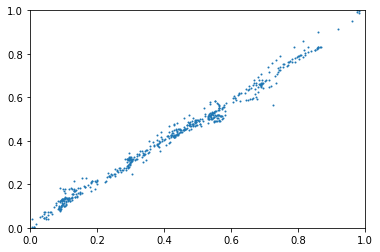

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(sess.run(hidden10,feed_dict={X: x_test,is_training:False}),y_test,s=1)
plt.axis([0,1,0,1])